In [1]:
import torch
import random
import numpy as np

# Set the random seed for CPU
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

# Check if CUDA is available
if torch.cuda.is_available():
    # Get the current GPU memory allocated
    memory_allocated = torch.cuda.memory_allocated()
    print(f"GPU Memory Allocated: {memory_allocated} bytes")
    # Clear cache
    torch.cuda.empty_cache()

    # Set the random seed for GPU
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

else:
    print("CUDA is not available")



GPU Memory Allocated: 0 bytes


In [2]:
#%% packages
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
# %% data import
iris = load_iris()
X = iris.data
y = iris.target

# %% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# %% convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (120, 4), y_train shape: (120,), X_test shape: (30, 4), y_test shape: (30,)


In [3]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [4]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define a custom dataset class
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
        self.len = len(X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len




In [6]:


# Create the dataset and data loaders
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [22]:
data, label = next(iter(train_loader))


print(f"X shape: {data.shape}, y shape: {label.shape}")


X shape: torch.Size([32, 4]), y shape: torch.Size([32])


In [20]:
label

tensor([2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 2, 0])

In [23]:
data

tensor([[4.8000, 3.4000, 1.9000, 0.2000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.6000, 3.0000, 4.1000, 1.3000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [5.5000, 2.6000, 4.4000, 1

In [24]:

# Define the model architecture
class ClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Set the hyperparameters
input_size = X_train.shape[1]
hidden_size = 16
num_classes = len(set(y_train))

# Create an instance of the model
model = ClassificationModel(input_size, hidden_size, num_classes)


model

ClassificationModel(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=3, bias=True)
)

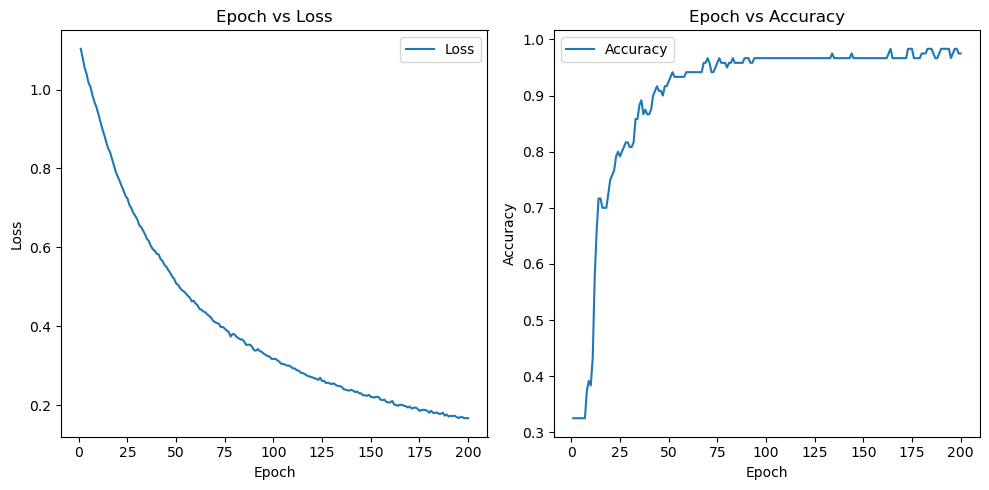

In [29]:
import matplotlib.pyplot as plt


# Create an instance of the model
model = ClassificationModel(input_size, hidden_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 200
losses = []
accuracies = []

for epoch in range(num_epochs):
    epoch_losses = []
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    accuracies.append(accuracy)
    losses.append(sum(epoch_losses) / len(epoch_losses))

# Plot epoch vs loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

# Plot epoch vs accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Confusion Matrix

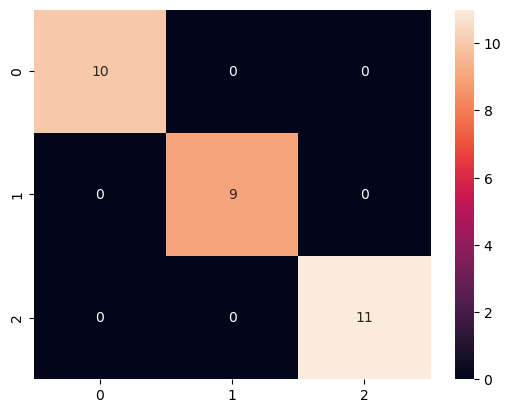

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.numpy())

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True)
plt.show()
